In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

# Import your economic model
from models import econmodel 

warnings.filterwarnings('ignore')

Load sector price data

In [99]:

# Replace the file path with your actual CSV file path
sector_data_path = r"C:\Users\devansh.bhatt\OneDrive - Lighthouse Canton Pte Ltd\Desktop\Python Files\Sector Models\Sector_data_old.csv"
sector_data = pd.read_csv(sector_data_path)

# Convert 'Date' to datetime
sector_data['Date'] = pd.to_datetime(sector_data['Date'], format='%d/%m/%Y')

# Pivot the data to have Date as index and TICKER as columns
sector_prices = sector_data.pivot(index='Date', columns='TICKER', values='PRC')

# Sort the index
sector_prices = sector_prices.sort_index()

sector_prices


TICKER,XLB,XLC,XLE,XLF,XLI,XLK,XLP,XLRE,XLU,XLV,XLY
Date,,,,,,,,,,,
2013-12-23,45.15,NaN,86.76,21.71,51.46,35.42000,42.51,NaN,37.68,55.12000,65.95000
2013-12-24,45.64,NaN,87.24,21.75,51.70,35.52000,42.57,NaN,37.83,55.02000,66.09000
2013-12-26,45.89,NaN,87.86,21.80,52.06,35.61000,42.74,NaN,37.66,55.43000,66.58000
2013-12-27,46.03,NaN,88.29,21.79,52.00,35.58000,42.84,NaN,37.81,55.38000,66.27000
2013-12-30,46.06,NaN,87.66,21.75,51.95,35.51000,42.95,NaN,37.90,55.47000,66.57000
...,...,...,...,...,...,...,...,...,...,...,...
2023-12-22,85.60,72.61,84.98,37.34,113.13,192.05000,71.22,39.73,62.62,135.02000,179.48000
2023-12-26,86.00,72.89,85.71,37.49,113.93,192.85001,71.52,40.02,63.00,135.32001,180.24001
2023-12-27,86.21,72.90,85.33,37.61,114.10,192.84000,71.85,40.25,62.96,135.89000,180.86000


Compute sector returns and resample to monthly frequency to align with econmodel scores

In [100]:
# Compute daily returns
sector_returns_daily = sector_prices.pct_change().dropna()

# Resample to monthly frequency (end of month) and compute monthly returns
sector_returns_monthly = sector_returns_daily.resample('M').agg(lambda x: (1 + x).prod() - 1)

sector_returns_monthly

TICKER,XLB,XLC,XLE,XLF,XLI,XLK,XLP,XLRE,XLU,XLV,XLY
Date,,,,,,,,,,,
2018-06-30,-0.007181,-0.008607,0.016056,-0.027788,-0.021849,-0.027439,0.009205,0.038413,0.035266,-0.016498,-0.022186
2018-07-31,0.028586,-0.021603,0.015539,0.051147,0.073852,0.020872,0.039589,0.010394,0.015974,0.065540,0.018024
2018-08-31,-0.007701,0.014858,-0.034751,0.013596,0.002340,0.065990,0.003920,0.024206,0.012881,0.043292,0.051047
2018-09-30,-0.022608,-0.003660,0.017464,-0.026474,0.016861,-0.003571,0.002789,-0.036632,-0.015336,0.025544,0.002309
2018-10-31,-0.091835,-0.060408,-0.113282,-0.047136,-0.108673,-0.080048,0.020026,-0.015946,0.019753,-0.067788,-0.101007
...,...,...,...,...,...,...,...,...,...,...,...
2023-08-31,-0.033014,-0.015409,0.016461,-0.026889,-0.019833,-0.015083,-0.039472,-0.030636,-0.061279,-0.007007,-0.017440
2023-09-30,-0.052359,-0.031891,0.016532,-0.035195,-0.063291,-0.066777,-0.054288,-0.079687,-0.064009,-0.033556,-0.056997
2023-10-31,-0.031700,-0.012963,-0.057528,-0.024420,-0.029789,0.000488,-0.013806,-0.028471,0.012897,-0.032624,-0.055162


Get econmodel scores

In [101]:
econ_raw_data_path = r"C:\Users\devansh.bhatt\OneDrive - Lighthouse Canton Pte Ltd\Desktop\Python Files\Raw Data\raw_data_econ.csv"

# Initialize and run the economic model
model = econmodel()
model.import_data(econ_raw_data_path)
model.calc_scores()
model.calc_wma(window=3)
s = model.calc_normalized_scores(data=model.weighted_ma_total)
s.index = pd.to_datetime(model.final_scores['DATE'])

s

DATE
2000-01-01    3.000000
2000-02-01    3.000000
2000-03-01    2.904762
2000-04-01    2.873016
2000-05-01    2.761905
                ...   
2024-06-01    3.761243
2024-07-01    3.748347
2024-08-01    3.359788
2024-09-01    4.164021
2024-10-01    4.356481
Length: 298, dtype: float64

Map econmodel scores to econonmic stages.

Initially, we map:
- scores >= 4 = Economic Expansion
- scores <= 2 = Economic Recession
- 2 > scores > 4 = Neutral

In [102]:
# -------------------------
# Step 4: Map Scores to Economic Stages
# -------------------------

# Define a function to map scores to economic stages
def map_score_to_stage(score):
    if score >= 4:
        return 'Expansion'
    elif score <= 2:
        return 'Recession'
    else:
        return 'Neutral'  # Corresponds to 'Unknown'

# Apply the mapping to create the 'Stage' series
stage_series = s.apply(map_score_to_stage)

# Create a DataFrame to hold the stages
cycle_stage = pd.DataFrame({
    'Score': s,
    'Stage': stage_series
})

# Resample the economic stages to monthly frequency using the last available stage in the month
cycle_stage_monthly = cycle_stage.resample('M').last()

# Align cycle stages with sector returns dates
cycle_stage_monthly = cycle_stage_monthly.reindex(sector_returns_monthly.index, method='ffill')

# Display the cycle stages
print("\nCycle Stages:")
print(cycle_stage_monthly)


Cycle Stages:
               Score      Stage
Date                           
2018-06-30  1.996362  Recession
2018-07-31  1.565476  Recession
2018-08-31  2.019511    Neutral
2018-09-30  2.099537    Neutral
2018-10-31  2.659722    Neutral
...              ...        ...
2023-08-31  3.128307    Neutral
2023-09-30  4.069775  Expansion
2023-10-31  4.190146  Expansion
2023-11-30  4.704034  Expansion
2023-12-31  4.701389  Expansion

[67 rows x 2 columns]


Define sectors and market cap weights. 

These are then normalised further, so that they always sum to 1 in the presence of rounding errors. This also allows for the removal of sectors without affecting overall relative weighting.

In [103]:
# Define the sector tickers
sector_tickers = ['XLU', 'XLE', 'XLRE', 'XLP', 'XLC', 'XLF', 'XLI', 'XLV', 'XLB', 'XLY', 'XLK']

# Define Market-Cap Weights (normalized to sum to 1)
market_cap_weights = {
    'XLK': 0.310784,  # Technology
    'XLF': 0.126471,  # Financials
    'XLV': 0.113725,  # Health Care
    'XLY': 0.099020,  # Consumer Discretionary
    'XLC': 0.087255,  # Communication Services
    'XLI': 0.083333,  # Industrials
    'XLP': 0.057843,  # Consumer Staples
    'XLE': 0.032353,  # Energy
    'XLRE': 0.022549,  # Real Estate
    'XLB': 0.021569,  # Materials
    'XLU': 0.019608   # Utilities
}


# Normalize the weights to sum to 1
market_cap_weights = pd.Series(market_cap_weights)
market_cap_weights = market_cap_weights / market_cap_weights.sum()

market_cap_weights


XLK     0.318913
XLF     0.129779
XLV     0.116700
XLY     0.101610
XLC     0.089537
XLI     0.085513
XLP     0.059356
XLE     0.033199
XLRE    0.023139
XLB     0.022133
XLU     0.020121
dtype: float64

Define the sectors to overweight for a given score

In [104]:
# Define which sectors to overweight in each economic stage
stage_overweight_sectors = {
    'Expansion': ['XLY', 'XLF', 'XLI', 'XLK'],   # Consumer Discretionary, Financials, Industrials, Technology
    'Recession': ['XLU', 'XLP', 'XLV', 'XLRE'],  # Utilities, Consumer Staples, Health Care, Real Estate
    'Neutral': []  # No deviation
}

We define a parameter $\alpha$, which dictates how much we overweight a sector for a given score. Sector weights for overweight sectors are given by: \
$$
Increase = \alpha \cdot market\_cap\_weight
$$ 
Thus,
$$
New\ weight = (1+\alpha) \cdot market\_cap\_weight
$$

In [105]:
# Define the deviation parameter
alpha = 0.2  # Controls the extent of deviation from market-cap weights

Note: this model gives the best results for high values of $\alpha$ ($\alpha>1$), which will lead to large deviations from market-cap weights, which may not be desired.

However, we still see outperformance for smaller values of $\alpha$ relative to the benchmark

Define the function to adjust the weights as per the formula above. The weights are then normalised and redistributed to sum to 1

In [106]:
# Function to adjust weights based on economic cycle stage
def adjust_weights(stage, market_caps, alpha):
    adjusted_weights = market_caps.copy()
    
    if stage not in stage_overweight_sectors or not stage_overweight_sectors[stage]:
        # No adjustment for 'Neutral' or undefined stages
        return adjusted_weights
    
    overweight_sectors = stage_overweight_sectors[stage]
    underweight_sectors = [sector for sector in sector_tickers if sector not in overweight_sectors]
    
    # Calculate the total increase in weights for overweight sectors
    increase = alpha * market_caps[overweight_sectors]
    adjusted_weights[overweight_sectors] += increase
    
    # Total increase to be offset by decreasing underweight sectors
    total_increase = increase.sum()
    
    # Calculate total underweight market cap
    total_underweight = market_caps[underweight_sectors].sum()
    
    if total_underweight > 0:
        # Proportionally decrease underweight sectors
        decrease = (market_caps[underweight_sectors] / total_underweight) * total_increase
        adjusted_weights[underweight_sectors] -= decrease
    else:
        # If no underweight sectors, distribute decrease uniformly among all sectors
        decrease = total_increase / len(sector_tickers)
        adjusted_weights -= decrease
    
    # Ensure no negative weights by setting a minimum weight
    adjusted_weights = adjusted_weights.clip(lower=0.001)  # Set a minimum weight
    
    # Normalize to sum to 1
    total = adjusted_weights.sum()
    if total <= 0 or np.isnan(total) or np.isinf(total):
        # Reset to market cap weights if normalization fails
        adjusted_weights = market_cap_weights.copy()
    else:
        adjusted_weights = adjusted_weights / total
    
    return adjusted_weights


Calculate and assign sector weights based on economic scores

In [107]:
# -------------------------
# Step 6: Assign Weights Based on Economic Cycle Stage
# -------------------------

# Create a DataFrame to hold the weights
weights = pd.DataFrame(index=sector_returns_monthly.index, columns=sector_tickers)

# Assign weights based on the economic cycle stage
for date in weights.index:
    stage = cycle_stage_monthly.loc[date, 'Stage']
    adjusted_weight = adjust_weights(stage, market_cap_weights, alpha)
    weights.loc[date] = adjusted_weight

# Ensure all weights are floats and handle any remaining NaNs
weights = weights.astype(float).fillna(market_cap_weights)

weights

,XLU,XLE,XLRE,XLP,XLC,XLF,XLI,XLV,XLB,XLY,XLK
Date,,,,,,,,,,,
2018-06-30,0.024145,0.031334,0.027767,0.071227,0.084507,0.122487,0.080708,0.140040,0.020890,0.095901,0.300995
2018-07-31,0.024145,0.031334,0.027767,0.071227,0.084507,0.122487,0.080708,0.140040,0.020890,0.095901,0.300995
2018-08-31,0.020121,0.033199,0.023139,0.059356,0.089537,0.129779,0.085513,0.116700,0.022133,0.101610,0.318913
2018-09-30,0.020121,0.033199,0.023139,0.059356,0.089537,0.129779,0.085513,0.116700,0.022133,0.101610,0.318913
2018-10-31,0.020121,0.033199,0.023139,0.059356,0.089537,0.129779,0.085513,0.116700,0.022133,0.101610,0.318913
...,...,...,...,...,...,...,...,...,...,...,...
2023-08-31,0.020121,0.033199,0.023139,0.059356,0.089537,0.129779,0.085513,0.116700,0.022133,0.101610,0.318913
2023-09-30,0.013095,0.021607,0.015059,0.038631,0.058273,0.155735,0.102615,0.075951,0.014405,0.121932,0.382696
2023-10-31,0.013095,0.021607,0.015059,0.038631,0.058273,0.155735,0.102615,0.075951,0.014405,0.121932,0.382696


We calculate the benchmark portfolio returns. This is the market-cap weighted portfolio with no deviations

In [108]:
# Calculate benchmark monthly returns
benchmark_returns = (market_cap_weights * sector_returns_monthly).sum(axis=1)


Calculate strategy and benchmark cumulative returns for backtesting. Returns are shifted by 1 to avoid forward bias/data leakage

In [109]:
# -------------------------
# Step 8: Backtest the Strategy
# -------------------------

# Shift weights by one month to avoid data leakage (use last month's weights for current month's returns)
strategy_monthly_weights = weights.shift(1).fillna(market_cap_weights)

# Calculate strategy monthly returns
portfolio_returns = (strategy_monthly_weights * sector_returns_monthly).sum(axis=1)

# Calculate cumulative returns
cumulative_strategy = (1 + portfolio_returns).cumprod()
cumulative_benchmark = (1 + benchmark_returns).cumprod()

Define strategy performance metrics:
$$
Annualized\ Return = (Compounded\ Return)^{12/n} - 1
$$


$$
Annualized\ Volatility = \text{Stdev(Returns)} \times \sqrt{12}
$$

$$
Sharpe\ Ratio = \frac{Mean(Excess\ Returns)}{Stdev(Excess\ Returns)}
$$

We take a risk-free rate of 0 for initial testing

In [110]:
def annualized_return(returns):
    compounded_growth = (1 + returns).prod()
    n_periods = len(returns)
    return compounded_growth ** (12 / n_periods) - 1  # Monthly to annual

def annualized_volatility(returns):
    return returns.std() * np.sqrt(12)  # Monthly to annual

def sharpe_ratio(returns, risk_free_rate=0.0):
    excess_returns = returns - (risk_free_rate / 12)  # Monthly risk-free rate
    return excess_returns.mean() / excess_returns.std() * np.sqrt(12)


Calculate Performance

In [111]:
# Strategy Performance
strategy_returns_clean = portfolio_returns.dropna()
strategy_annual_return = annualized_return(strategy_returns_clean)
strategy_annual_vol = annualized_volatility(strategy_returns_clean)
strategy_sharpe = sharpe_ratio(strategy_returns_clean)

# Benchmark Performance
benchmark_returns_clean = benchmark_returns.dropna()
benchmark_annual_return = annualized_return(benchmark_returns_clean)
benchmark_annual_vol = annualized_volatility(benchmark_returns_clean)
benchmark_sharpe = sharpe_ratio(benchmark_returns_clean)

print('--- Strategy Performance ---')
print(f'Annualized Return: {strategy_annual_return:.2%}')
print(f'Annualized Volatility: {strategy_annual_vol:.2%}')
print(f'Sharpe Ratio: {strategy_sharpe:.2f}')

print('\n--- Market-Cap Weighted Benchmark Performance ---')
print(f'Annualized Return: {benchmark_annual_return:.2%}')
print(f'Annualized Volatility: {benchmark_annual_vol:.2%}')
print(f'Sharpe Ratio: {benchmark_sharpe:.2f}')


--- Strategy Performance ---
Annualized Return: 12.41%
Annualized Volatility: 19.16%
Sharpe Ratio: 0.71

--- Market-Cap Weighted Benchmark Performance ---
Annualized Return: 11.54%
Annualized Volatility: 19.01%
Sharpe Ratio: 0.67


Plot Cumulative Returns

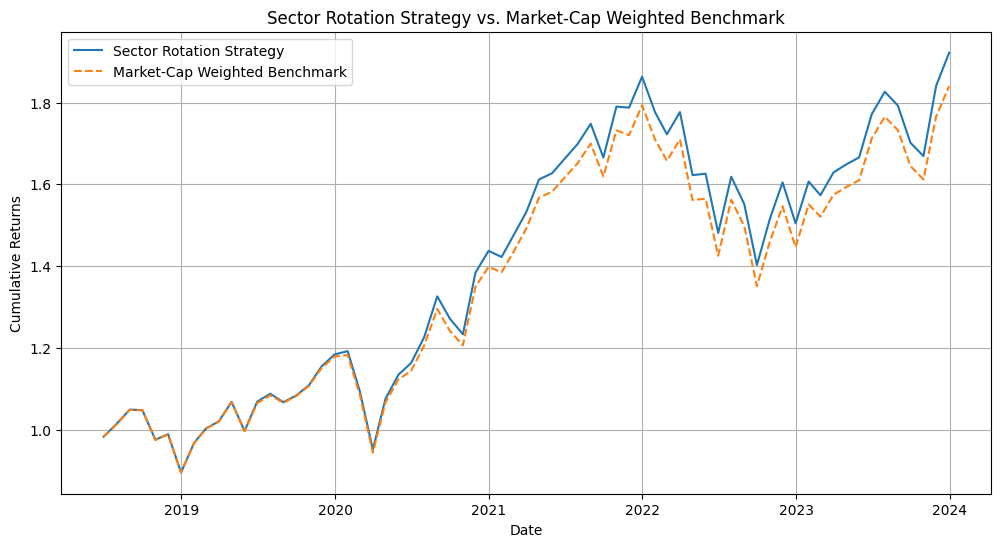

In [112]:
# -------------------------
# Step 10: Plot the Strategy vs. Benchmark
# -------------------------

plt.figure(figsize=(12,6))
plt.plot(cumulative_strategy, label='Sector Rotation Strategy')
plt.plot(cumulative_benchmark, label='Market-Cap Weighted Benchmark', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.title('Sector Rotation Strategy vs. Market-Cap Weighted Benchmark')
plt.legend()
plt.grid(True)
plt.show()


Since the optimization of the strategy may be biased towards higher tech weights, we test performance in the absence of the tech sector. \
We renormalise weights to sum to 1

In [113]:
# Define the sector tickers
sector_tickers = ['XLU', 'XLE', 'XLRE', 'XLP', 'XLC', 'XLF', 'XLI', 'XLV', 'XLB', 'XLY'] # Removed XLK

# Define Market-Cap Weights (normalized to sum to 1)
market_cap_weights = {
    # 'XLK': 0.310784,  # Technology
    'XLF': 0.126471,  # Financials
    'XLV': 0.113725,  # Health Care
    'XLY': 0.099020,  # Consumer Discretionary
    'XLC': 0.087255,  # Communication Services
    'XLI': 0.083333,  # Industrials
    'XLP': 0.057843,  # Consumer Staples
    'XLE': 0.032353,  # Energy
    'XLRE': 0.022549,  # Real Estate
    'XLB': 0.021569,  # Materials
    'XLU': 0.019608   # Utilities
}

# Normalize the weights to sum to 1
market_cap_weights = pd.Series(market_cap_weights)
market_cap_weights = market_cap_weights / market_cap_weights.sum()

market_cap_weights

XLF     0.190547
XLV     0.171343
XLY     0.149188
XLC     0.131462
XLI     0.125553
XLP     0.087149
XLE     0.048745
XLRE    0.033973
XLB     0.032497
XLU     0.029542
dtype: float64

In [114]:
# Define which sectors to overweight in each economic stage
stage_overweight_sectors = {
    'Expansion': ['XLY', 'XLF', 'XLI'],   # Consumer Discretionary, Financials, Industrials (Technology removed)
    'Recession': ['XLU', 'XLP', 'XLV', 'XLRE'],  # Utilities, Consumer Staples, Health Care, Real Estate
    'Neutral': []  # No deviation
}

We keep $\alpha$ the same as before

In [115]:
# Create a DataFrame to hold the weights
weights = pd.DataFrame(index=sector_returns_monthly.index, columns=sector_tickers)

# Assign weights based on the economic cycle stage
for date in weights.index:
    stage = cycle_stage_monthly.loc[date, 'Stage']
    adjusted_weight = adjust_weights(stage, market_cap_weights, alpha)
    weights.loc[date] = adjusted_weight

# Ensure all weights are floats and handle any remaining NaNs
weights = weights.astype(float).fillna(market_cap_weights)

weights

,XLU,XLE,XLRE,XLP,XLC,XLF,XLI,XLV,XLB,XLY
Date,,,,,,,,,,
2018-06-30,0.035451,0.044114,0.040768,0.104579,0.118975,0.172447,0.113627,0.205612,0.029410,0.135017
2018-07-31,0.035451,0.044114,0.040768,0.104579,0.118975,0.172447,0.113627,0.205612,0.029410,0.135017
2018-08-31,0.029542,0.048745,0.033973,0.087149,0.131462,0.190547,0.125553,0.171343,0.032497,0.149188
2018-09-30,0.029542,0.048745,0.033973,0.087149,0.131462,0.190547,0.125553,0.171343,0.032497,0.149188
2018-10-31,0.029542,0.048745,0.033973,0.087149,0.131462,0.190547,0.125553,0.171343,0.032497,0.149188
...,...,...,...,...,...,...,...,...,...,...
2023-08-31,0.029542,0.048745,0.033973,0.087149,0.131462,0.190547,0.125553,0.171343,0.032497,0.149188
2023-09-30,0.024401,0.040261,0.028061,0.071982,0.108584,0.228656,0.150664,0.141524,0.026841,0.179026
2023-10-31,0.024401,0.040261,0.028061,0.071982,0.108584,0.228656,0.150664,0.141524,0.026841,0.179026


Compute new benchmark without tech

In [116]:
# Calculate benchmark monthly returns
benchmark_returns = (market_cap_weights * sector_returns_monthly).sum(axis=1)

Backtest strategy

In [117]:
# Shift weights by one month to avoid data leakage (use last month's weights for current month's returns)
strategy_monthly_weights = weights.shift(1).fillna(market_cap_weights)

# Calculate strategy monthly returns
portfolio_returns = (strategy_monthly_weights * sector_returns_monthly).sum(axis=1)

# Calculate cumulative returns
cumulative_strategy = (1 + portfolio_returns).cumprod()
cumulative_benchmark = (1 + benchmark_returns).cumprod()

In [118]:
# Strategy Performance
strategy_returns_clean = portfolio_returns.dropna()
strategy_annual_return = annualized_return(strategy_returns_clean)
strategy_annual_vol = annualized_volatility(strategy_returns_clean)
strategy_sharpe = sharpe_ratio(strategy_returns_clean)

# Benchmark Performance
benchmark_returns_clean = benchmark_returns.dropna()
benchmark_annual_return = annualized_return(benchmark_returns_clean)
benchmark_annual_vol = annualized_volatility(benchmark_returns_clean)
benchmark_sharpe = sharpe_ratio(benchmark_returns_clean)

print('--- Strategy Performance ---')
print(f'Annualized Return: {strategy_annual_return:.2%}')
print(f'Annualized Volatility: {strategy_annual_vol:.2%}')
print(f'Sharpe Ratio: {strategy_sharpe:.2f}')

print('\n--- Market-Cap Weighted Benchmark Performance ---')
print(f'Annualized Return: {benchmark_annual_return:.2%}')
print(f'Annualized Volatility: {benchmark_annual_vol:.2%}')
print(f'Sharpe Ratio: {benchmark_sharpe:.2f}')

--- Strategy Performance ---
Annualized Return: 8.17%
Annualized Volatility: 18.43%
Sharpe Ratio: 0.52

--- Market-Cap Weighted Benchmark Performance ---
Annualized Return: 7.77%
Annualized Volatility: 18.37%
Sharpe Ratio: 0.50


Plot strategy and benchmark returns

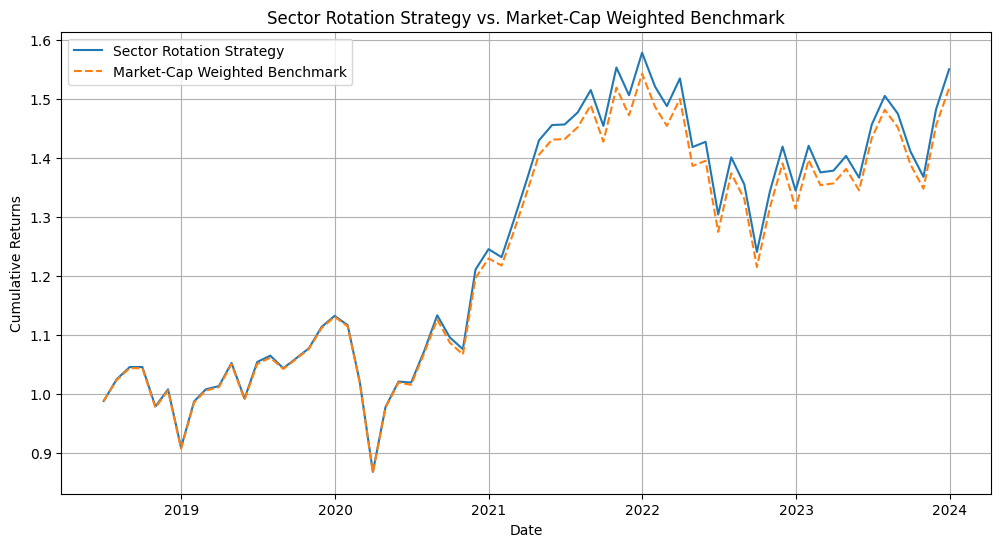

In [119]:
plt.figure(figsize=(12,6))
plt.plot(cumulative_strategy, label='Sector Rotation Strategy')
plt.plot(cumulative_benchmark, label='Market-Cap Weighted Benchmark', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.title('Sector Rotation Strategy vs. Market-Cap Weighted Benchmark')
plt.legend()
plt.grid(True)
plt.show()

We see the strategy still outerforms the benchmark in the absence of tech